Inspired from https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l10c01_nlp_lstms_with_reviews_subwords_dataset.ipynb#scrollTo=G2FJR3IVBt30



Udacity course:   Introduction to Deep Learning with Tensorflow

In this notebook, we will compare the LSTM(Long Short Term Memory). Actualy LSTM is the neural network which depends on

(1) current input

(2) Input from the previous memory

We will take the Amazon and Yelp reviews dataset. And compare the model with the different bbidirectional datasets too.

In [1]:
## Get the Datasets
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2020-06-20 05:46:29--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.203.100, 172.217.203.113, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7hc1aqlli0u7blgd53ltnslengntb45/1592631975000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-06-20 05:46:30--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7hc1aqlli0u7blgd53ltnslengntb45/1592631975000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|1

In [2]:
import pandas as pd
dataset = pd.read_csv('/tmp/sentiment.csv')

In [3]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


1 is the positive review and O is the negative review

In [4]:
sentences = dataset['text'].tolist()

In [5]:
sentences[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [9]:
labels = dataset['sentiment'].tolist()
labels[0]

0

In [10]:
for data in range(5):
    print("{}:  {}".format(sentences[data], labels[data]))
    print('\n')

So there is no way for me to plug it in here in the US unless I go by a converter.:  0


Good case Excellent value.:  1


Great for the jawbone.:  1


Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!:  0


The mic is great.:  1




We will use the SubwordTextEncoder.build_from_corpus() to create a subword

In [13]:
import tensorflow_datasets as tfds
vocab_size = 1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [14]:
tokenizer.vocab_size

999

In [15]:
# check that tokenizer words as expected
encoded_sent=tokenizer.encode(sentences[0])

In [18]:
encoded_sent, sentences[0]

([736,
  168,
  775,
  7,
  193,
  417,
  17,
  94,
  6,
  600,
  438,
  775,
  14,
  19,
  141,
  19,
  1,
  828,
  826,
  775,
  99,
  445,
  4,
  174,
  361,
  5,
  79,
  227,
  139,
  789],
 'So there is no way for me to plug it in here in the US unless I go by a converter.')

In [20]:
for i in encoded_sent:
    print(tokenizer.decode([i]))

So 
there
 
is 
no 
way 
for 
me 
to 
pl
ug
 
it 
in 
here 
in 
the 
U
S
 
un
less 
I 
go 
by 
a 
con
ver
ter
.


In [21]:
# replace sentences word with the encoded numbers

for i, sent in enumerate(sentences):
    sentences[i]=tokenizer.encode(sent)

In [22]:
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [24]:
# FInal Preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length=50
trunc_type='post'
padd_type='post'
import numpy as np
sequences_padded = pad_sequences(sentences,
                                 maxlen=max_length,
                                 padding=padd_type,
                                 truncating=trunc_type
                                 )

In [25]:
training_size = int(len(sentences) * 0.8)
print(training_size)

1593


In [64]:
training_sentence = sequences_padded[0:training_size]
testing_sentence = sequences_padded[training_size:]
training_label = labels[0:training_size]
testing_label = labels[training_size:]

In [65]:
print("Training size: {} \n\
Testing size: {}".format(len(training_sentence),len(testing_sentence)))

Training size: 1593 
Testing size: 399


In [66]:
training_final_label = np.array(training_label)

In [67]:
testing_final_label = np.array(testing_label)

In [68]:
training_final_label[:3]

array([0, 1, 1])

### Create the model

In [69]:
import tensorflow as tf
embedding_size = 16
model = tensorflow.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(6, activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Train the model


num_Epochs = 30

model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='binary_crossentropy')

In [72]:
history = model.fit(training_sentence, training_final_label,
                    epochs=num_Epochs,
                    validation_data=(testing_sentence,
                                     testing_final_label)
                    )


Epoch 1/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5254 - val_loss: 0.6992 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5330 - val_loss: 0.7002 - val_accuracy: 0.4211
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5505 - val_loss: 0.6959 - val_accuracy: 0.4586
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5976 - val_loss: 0.6918 - val_accuracy: 0.4787
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6290 - val_loss: 0.6768 - val_accuracy: 0.5038
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6962 - val_loss: 0.6647 - val_accuracy: 0.5238
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7357 - val_loss: 0.6541 - val_accuracy: 0.5514
Epoch 8/30
50/50 [==

In [76]:
# Plot the data

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

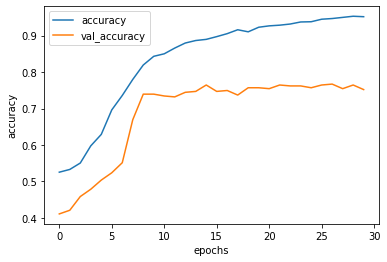

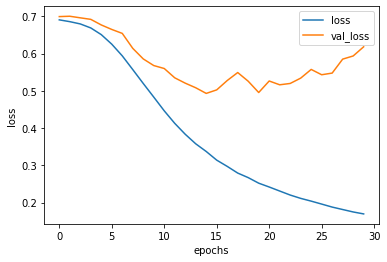

In [77]:
plot_graphs(history, 'accuracy')
plot_graphs(history,'loss')

Validation loss increases when epochs increases

In [78]:
# function to predict the sentences

In [79]:
def predict_review(model, new_sentences, maxlen=max_length):
    extra = []
    for i, data in enumerate(new_sentences):
        extra.append(tokenizer.encode(data))
    new_padded = pad_sequences(extra,padding='post',truncating='post',
                               maxlen=max_length)
    classes = model.predict(new_padded)
    for x in range(len(new_sentences)):
        print(new_sentences[x])
        print(classes[x])

In [81]:
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]
predict_review(model,fake_reviews)

I love this phone
[0.9496874]
Everything was cold
[0.13924673]
Everything was hot exactly as I wanted
[0.35601562]
Everything was green
[0.14216337]
the host seated us immediately
[0.6295292]
they gave us free chocolate cake
[0.8100488]
we couldn't hear each other talk because of the shouting in the kitchen
[0.05128882]


Number closes to 1 more positive review
Number far from 1 , less poritive review

In [94]:
# create the model
def fit_model_now(model,sentences):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sentence, training_final_label,
                    epochs=num_Epochs,
                    validation_data=(testing_sentence,
                                     testing_final_label)
                    )
    return history

In [95]:
def plot_results(history):
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')

In [100]:
def fit_model_and_show_result(model,sentence):
    history = fit_model_now(model,sentences)
    plot_results(history)
    predict_review(model,sentence)

We have created the function for all the required utility and will call them below accordingly

### Add Bidirectional LSTM

In [101]:
model_1 = tensorflow.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_size,input_length=max_length),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
tf.keras.layers.Dense(6,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

In [102]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 2s 44ms/step - loss: 0.6916 - accuracy: 0.5217 - val_loss: 0.6973 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 29ms/step - loss: 0.6606 - accuracy: 0.5606 - val_lo

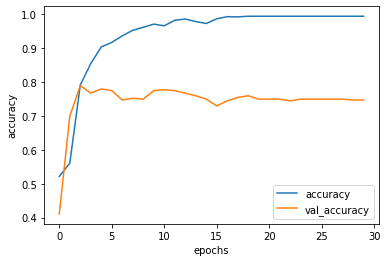

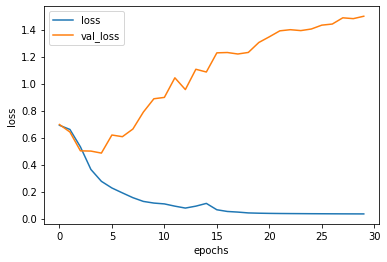

I love this phone
[0.99542135]
Everything was cold
[0.01203963]
Everything was hot exactly as I wanted
[0.02036002]
Everything was green
[0.01258796]
the host seated us immediately
[0.9993753]
they gave us free chocolate cake
[0.9967804]
we couldn't hear each other talk because of the shouting in the kitchen
[0.01197759]


In [103]:
fit_model_and_show_result(model_1,fake_reviews)

USe Multidirectioanl LSTM

In [107]:
model_multi_lstm = tensorflow.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_size,input_length=max_length)                                                ,
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size,
                                                   return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
tf.keras.layers.Dense(6,activation='relu') ,
tf.keras.layers.Dense(1,activation='sigmoid')
                                                
                                                
])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 4s 87ms/step - loss: 0.6926 - accuracy: 0.5217 - val_loss: 0.696

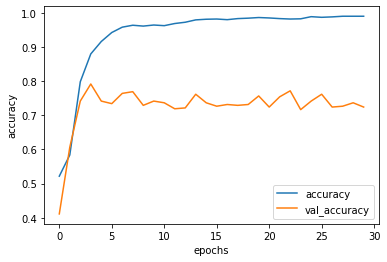

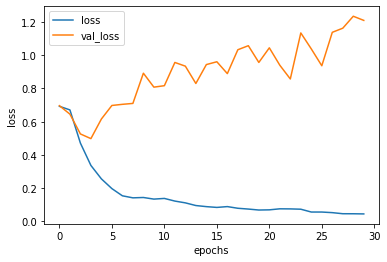

I love this phone
[0.9974139]
Everything was cold
[0.0279446]
Everything was hot exactly as I wanted
[0.77891964]
Everything was green
[0.00612631]
the host seated us immediately
[0.02960977]
they gave us free chocolate cake
[0.9968989]
we couldn't hear each other talk because of the shouting in the kitchen
[0.02787641]


In [108]:
fit_model_and_show_result(model_multi_lstm,fake_reviews)

Compare the models

(1) EMbedding layers + GLobal average pooling

(2) EMbedding layers + bidirectional lstm

(3) EMbedding layers + multi dimensional lstm

In [110]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [112]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model,my_reviews)
print("===================================\n","Embeddings + LSTM only:\n", "===================================",)
predict_review(model_1,my_reviews)
print("===================================\n","Embeddings + MULTI LSTMonly:\n", "===================================",)
predict_review(model_multi_lstm,my_reviews)

 Embeddings only:
lovely
[0.9989921]
dreadful
[0.03085211]
stay away
[0.65724725]
everything was hot exactly as I wanted
[0.977672]
everything was not exactly as I wanted
[0.5506321]
they gave us free chocolate cake
[0.965486]
I've never eaten anything so spicy in my life, my throat burned for hours
[0.02725124]
for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.0779632]
we left there very full for a low price so I'd say you just can't go wrong at this place
[0.11900139]
that place does not have quality meals and it isn't a good place to go for dinner
[0.93118894]
 Embeddings + LSTM only:
lovely
[0.9997532]
dreadful
[0.00897878]
stay away
[0.00959018]
everything was hot exactly as I wanted
[0.02239481]
everything was not exactly as I wanted
[0.00865409]
they gave us free chocolate cake
[0.47051415]
I've never eaten anything so spicy in my life, my throat burned for hours
[0.9872371]
for a phone that is as expensive as this one I expe